<a href="https://colab.research.google.com/github/cbai96cbai/NEW-REPO/blob/main/sample_company_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sample real survey data analysis/visualizations**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

import altair as alt
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Telecomm Inc. Data.xlsx to Telecomm Inc. Data.xlsx


In [ ]:
import io

df = pd.read_excel(io.BytesIO(uploaded['Telecomm Inc. Data.xlsx']))

In [ ]:
df.head()

,record,uuid,date,markers,status,vlist,qtime,vos,vosr15oe,vbrowser,...,Infoq20multir4,Infoq20multir5,Infoq20multir6,Infoq20multir7oe,Infoq20multir7oeoe,Infoq21single,Infoq23single,Infoq23singler6oeoe,Infoq25single,Infoq25singler4oeoe
0,234,c04azyfjw9vb0dk3,01/30/2023 06:53,"20220915_13:57_v16,/Quota Frontline/kIhsn/pLP7...",3,2,436.276450,12,NaN,11,...,0.0,5.0,6.0,0.0,NaN,2.0,3.0,NaN,4.0,Hard to earn points guess tight budget
1,377,tsr7s5mxpnr0ukvm,01/30/2023 07:00,"20220915_13:57_v16,/Quota Frontline/yotms/OwlL...",3,2,1017.251896,12,NaN,11,...,0.0,5.0,6.0,0.0,NaN,2.0,1.0,NaN,2.0,NaN
2,408,yevb2gbr93udu6j4,01/30/2023 07:02,"20220915_13:57_v16,/Quota Frontline/yotms/Fp2P...",3,2,516.225473,12,NaN,11,...,4.0,5.0,0.0,0.0,NaN,2.0,6.0,little reward points to be earned,4.0,Not enough ways to earn points
3,208,vxgkq9pay63daj3w,01/30/2023 06:44,"20220915_13:57_v16,/Quota Frontline/kIhsn/pLP7...",3,2,626.980968,12,NaN,10,...,0.0,0.0,0.0,7.0,Co workers,2.0,6.0,Look for mortgage pyments as an option,4.0,it doesnt pay my bills
4,494,d2th4h9hh8mspn23,01/30/2023 10:05,"20220915_13:57_v16,/Quota Frontline/WjIkS/OwlL...",3,2,12470.647879,12,NaN,10,...,0.0,5.0,6.0,0.0,NaN,3.0,2.0,NaN,NaN,NaN


# Preprocessing

In [ ]:
data_o = df.drop(['record','uuid','date','markers','status','qtime','start_date','source','userAgent','dcua','session', 'fp_etag','fp_html5','list'], axis=1)

NameError: ignored

In [ ]:
data_o = data_o.dropna(how='all', axis=1)
data_o.info()

In [ ]:
#to get an idea of missing values, will clean up + some cells are supposed to be empty
missing_df = (data_o.isnull()
            .sum()
            .to_frame('missing_count')
            .assign(missing_ratio = lambda x: x['missing_count']/len(data_o))
            .loc[data_o.isnull().any()] )
print(missing_df)

In [ ]:
data_o.rename(columns = {'Infoq8rank1Exper':'Technical knowledge of the products', 'Infoq8rank2Quali':'Expertise in the field','Infoq8rank3Quali': 'Timeliness',
'Infoq8rank4Selec':'Whole home solutioning', 'Infoq8rank5Quali':'Owning the resolution for the customer','Infoq8rank6Exper': 'Warmth and friendliness',
'Infoq8rank7Exper':'Recognizing when to advise on customers needs', 'Infoq8rank8Exper':'Recommendations','Infoq8rank9Price': 'Helping customers get the most value out of their services',
'Infoq8rank10Brand':'Brand Ambassadorship'}, inplace = True)

In [ ]:
data_o.rename(columns = {'vlist':'Participant', 'vos':'Operating System',
                              'vbrowser':'Browser', 'vmobiledevice': ' Mobile Device', 'vmobileos': 'Mobile OS', 'Headq6geo':'Division', 'Headq3roletypeA': 'Role', 'Headq2worktype':'Frontline Role', 'Headq4tenure':'Tenure', "Headq5tenure":'Role Tenure'}, inplace = True)


In [ ]:

data_o = data_o.drop(['Mobile OS',' Mobile Device','Browser', 'Operating System'],axis = 1)

In [ ]:
#split data into 2 for leadership and frontline, we'll mainly look at the frontline since it has majority of the data
data = data_o[data_o['Participant'] == 2]
data_l = data_o[data_o['Participant'] == 1]
data['Participant'].unique()


In [ ]:
#alos split into supervisor and tech ops
data_super = data_o[data_o['Frontline Role'] == 0]
data_tech = data_o[data_o['Frontline Role'] == 1]
data_super

# Exploritory Data Analysis

In [ ]:

temp_series = data_o['vlist'].value_counts()
temp_series.rename(index ={ 1:'Leadership', 2: 'Frontline'}, inplace = True)

labels = (np.array(temp_series.index))

sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='participant distribution',width=400, height=300
)

#fig.update_layout(width=20, height=10)
data1 = [trace]
figsize=(3, 2)
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="participant")

In [ ]:
temp_series = data_o['vos'].value_counts()

temp_series.rename(index ={ 4:'Windows 10', 12: 'iPhone/iPad', 13: 'Mac OS X or older', 14: 'Other Mobile'}, inplace = True)

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='operating system distribution',width=400, height=300
)
data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="operating system")

In [ ]:
temp_series = data_o['vbrowser'].value_counts()
temp_series.rename(index ={ 10:'Chrome', 11: 'Safari'}, inplace = True)
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='browser distribution',width=400, height=300
)
data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="browser")

In [ ]:
temp_series = data_o['vmobiledevice'].value_counts()
temp_series.rename(index ={ 1:'Smartphone', 3: 'Tablet', 5: 'Desktop'}, inplace = True)
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='mobile distribution',width=400, height=300
)
data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="mobile")

In [ ]:
temp_series = data_o['vmobileos'].value_counts()
temp_series.rename(index ={ 1:'iOS', 2: 'Android', 6: 'Other/Desktop'}, inplace = True)

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='mobile os distribution',width=400, height=300
)
data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="mobile os")

In [ ]:
cnt_srs = data_o['Headq6geo'].value_counts()
cnt_srs.rename(index ={ 0:'West', 1: 'Central', 2: 'East', 3:'Headquarters'}, inplace = True)
trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 2,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Location Distribution', width=500, height=400
)

data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="Location")

In [ ]:
cnt_srs = data_o['Headq3roletypeA'].value_counts().head(20)
cnt_srs.rename(index ={ 0:'Supervisor', 1: 'Technician 1', 2: 'Technician 2', 3:'Technician 3',
                       4:'Technician 4', 5: 'Director', 6: 'Exec Director', 7:'Manager',
                       8:'RVP', 9: 'Sr Director', 10: 'Sr Manager', 11:'VP'}, inplace = True)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Viridis',
        reversescale = True,
        showscale=True
    ),
)

layout = dict(
    title='Current Role Distribution ',width=500, height=400
    )
data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="CurrentEmployerType")

In [ ]:

cnt_srs = data_o['Headq2worktype'].value_counts()
cnt_srs.rename(index ={ 0:'Supervisor', 1: 'Technician'}, inplace = True)

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 5,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=False
    ),
)

layout = go.Layout(
    title='Frontline Role Distribution',width=500, height=400
)

data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="CodeWriter")

In [ ]:
cnt_srs = data_o['Headq4tenure'].value_counts()
cnt_srs.rename(index ={ 1:'Less than 1 year', 2: '1 to 3 years',3:'4 to 6 years', 4: '7 to 9 years', 5:'10 years or more'}, inplace = True)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Jet',
        showscale=True
    ),
)

layout = go.Layout(
    title='How long have you been with Telecomm Inc. ',width=500, height=400
)

data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="tenure")

In [ ]:
cnt_srs = data_o['Headq5tenure'].value_counts()
cnt_srs.rename(index ={ 1:'Less than 1 year', 2: '1 to 3 years',3:'4 to 6 years', 4: '7 to 9 years', 5:'10 years or more'}, inplace = True)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        showscale=False
    ),
)

layout = go.Layout(
    title='role tenure distribution',width=500, height=400
)

data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="role tenure")


# Investigative Data Analysis

## Q8
##### Below are 10 factors a customer may consider when receiving install or repair services from their telecom provider.Rank each of the factors by what YOU BELIEVE a customer considers most important (1) to least important (10) in the service provided by an in-home technician.

In [ ]:
Q8 = data.iloc[:,:16]
Q8_o = data_o.iloc[:,:16]
Q8_l = data_l.iloc[:,:16]
Q8_sup = data_super.iloc[:,:16]
Q8_tech = data_tech.iloc[:,:16]


In [ ]:
#ranking the factors - frontline
col_Q8 = Q8.columns[6:]
mean_values = round(Q8[col_Q8].mean(),2)
rank_values = mean_values.rank()
sorted_values = mean_values.sort_values()
sorted_values = sorted_values.reset_index()
sorted_values = sorted_values.rename(columns = {0:"val"})
sorted_values

,index,val
0,Technical knowledge of the products,3.41
1,Expertise in the field,3.92
2,Timeliness,4.08
3,Warmth and friendliness,4.11
4,Owning the resolution for the customer,4.54
5,Helping customers get the most value out of th...,5.95
6,Whole home solutioning,6.40
7,Recognizing when to advise on customers needs,6.49
8,Recommendations,8.04
9,Brand Ambassadorship,8.06


In [ ]:
#ranking the factors - leadership
col_Q8_l = Q8_l.columns[6:]
mean_values_l = round(Q8_l[col_Q8_l].mean(),2)
rank_values_l = mean_values_l.rank()
sorted_values_l = mean_values_l.sort_values()
sorted_values_l = sorted_values_l.reset_index()
sorted_values_l = sorted_values_l.rename(columns = {0:"val"})
sorted_values_l

,index,val
0,Owning the resolution for the customer,2.73
1,Timeliness,2.86
2,Technical knowledge of the products,4.09
3,Warmth and friendliness,4.45
4,Expertise in the field,5.50
5,Whole home solutioning,6.05
6,Recognizing when to advise on customers needs,6.32
7,Helping customers get the most value out of th...,7.18
8,Brand Ambassadorship,7.36
9,Recommendations,8.45


In [ ]:
#ranking the factors - supervisor
col_Q8_sup = Q8_sup.columns[6:]
mean_values_sup = round(Q8_sup[col_Q8_sup].mean(),2)
rank_values_sup = mean_values_sup.rank()
sorted_values_sup = mean_values_sup.sort_values()
sorted_values_sup = sorted_values_sup.reset_index()
sorted_values_sup = sorted_values_sup.rename(columns = {0:"val"})
sorted_values_sup

,index,val
0,Technical knowledge of the products,3.12
1,Owning the resolution for the customer,3.40
2,Timeliness,3.93
3,Expertise in the field,4.12
4,Warmth and friendliness,4.18
5,Helping customers get the most value out of th...,6.31
6,Whole home solutioning,6.54
7,Recognizing when to advise on customers needs,6.73
8,Recommendations,8.27
9,Brand Ambassadorship,8.40


In [ ]:
#ranking the factors - tech ops
col_Q8_tech = Q8_tech.columns[6:]
mean_values_tech = round(Q8_tech[col_Q8_tech].mean(),2)
rank_values_tech = mean_values_tech.rank()
sorted_values_tech = mean_values_tech.sort_values()
sorted_values_tech = sorted_values_tech.reset_index()
sorted_values_tech = sorted_values_tech.rename(columns = {0:"val"})
sorted_values_tech

,index,val
0,Technical knowledge of the products,3.48
1,Expertise in the field,3.88
2,Warmth and friendliness,4.09
3,Timeliness,4.12
4,Owning the resolution for the customer,4.82
5,Helping customers get the most value out of th...,5.86
6,Whole home solutioning,6.37
7,Recognizing when to advise on customers needs,6.42
8,Recommendations,7.98
9,Brand Ambassadorship,7.98


In [ ]:
total_frontline = sorted_values['val'].sum()
total_leadership = sorted_values_l['val'].sum()
total_sup = sorted_values_sup['val'].sum()
total_tech = sorted_values_tech['val'].sum()
#total_value = sum([sum(sorted_values_l[col]) for col in sorted_values_l.columns])

#percent_text = [f'{x:.2f}%' for x in (sorted_values / total_values * 100)]
#percent_text_l = [f'{x:.2f}%' for x in (sorted_values_l / total_values_l * 100)]


trace1 = go.Bar(
    y=sorted_values_front['val'].values,
    x=sorted_values_front['Frontline'],
    orientation = 'v',
    name = "Frontline",
    text=[f"{val:.1f}%" for val in sorted_values['val'].values],
    #text=percent_text,
    textposition='auto',
    marker=dict(color='rgb(51,204,204)')
)
trace2 = go.Bar(
    y=sorted_values_lead['val'].values,
    x=sorted_values_lead['Lead'].values,
    orientation = 'v',
    name = "Leadership",
    text=[f"{val:.1f}%" for val in sorted_values_l['val'].values],
    #text=percent_text_l,
    textposition='auto',
    marker=dict(color='rgb(90,34,300)')
)

trace3 = go.Bar(
    y=sorted_values_sup['index'],
    x=sorted_values_sup['val'].values,
    orientation = 'v',
    name = "Supervisor",
    text=[f"{val:.1f}%" for val in sorted_values_sup['val'].values],
    #text=percent_text_l,
    textposition='auto',
    marker=dict(color='rgb(0, 102, 204)')
)

trace4 = go.Bar(
    y=sorted_values_tech['index'],
    x=sorted_values_tech['val'].values,
    orientation = 'v',
    name = "Tech Ops",
    text=[f"{val:.1f}%" for val in sorted_values_tech['val'].values],
    #text=percent_text_l,
    textposition='auto',
    marker=dict(color='rgb(51, 88, 102)')
)



layout = go.Layout(
    title='How important are those factors?, lower number more important',
    barmode='stack',
    width = 800,
    height = 500
    #yaxis=dict(tickangle=-45),
)

data1 = [trace1, trace2,trace3,trace4]
fig = go.Figure(data=data1, layout=layout)

fig.show()
#py.iplot(fig, filename="WorkToolsFrequency")

NameError: ignored

In [ ]:
Q8.columns

Index(['Participant', 'Division', 'Role', 'Frontline Role', 'Tenure',
       'Role Tenure', 'Technical knowledge of the products',
       'Expertise in the field', 'Timeliness', 'Whole home solutioning',
       'Owning the resolution for the customer', 'Warmth and friendliness',
       'Recognizing when to advise on customers needs', 'Recommendations',
       'Helping customers get the most value out of their services',
       'Brand Ambassadorship'],
      dtype='object')

In [ ]:
selected = Q8[['Participant','Division','Role','Frontline Role', 'Tenure', 'Role Tenure']]
selected_l = Q8_l[['Participant','Division','Role','Frontline Role', 'Tenure', 'Role Tenure']]
selected_sup = Q8_l[['Participant','Division','Role','Frontline Role', 'Tenure', 'Role Tenure']]
selected_tech = Q8_l[['Participant','Division','Role','Frontline Role', 'Tenure', 'Role Tenure']]

In [ ]:
correlations = selected.corrwith(Q8['Technical knowledge of the products'])
correlations_l = selected_l.corrwith(Q8_l['Owning the resolution for the customer'])
correlations_sup = selected_sup.corrwith(Q8_sup['Technical knowledge of the products'])
correlations_tech = selected_tech.corrwith(Q8_tech['Technical knowledge of the products'])

In [ ]:
correlations = correlations.sort_values(ascending=False)
correlations_l = correlations_l.sort_values(ascending=False)
correlations_sup = correlations_sup.sort_values(ascending=False)
correlations_tech = correlations_tech.sort_values(ascending=False)
correlations

Frontline Role    0.059781
Division          0.051266
Role              0.037170
Tenure           -0.066983
Role Tenure      -0.073589
Participant            NaN
dtype: float64

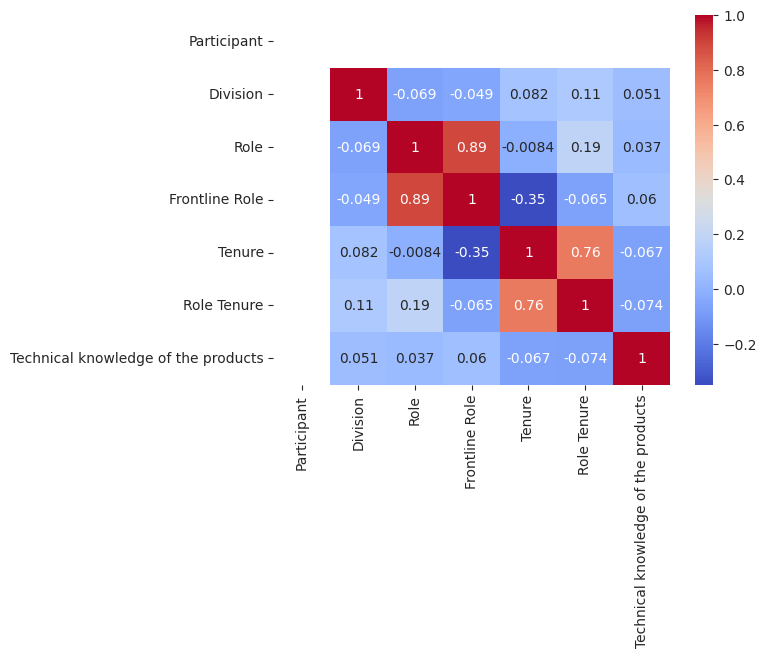

In [ ]:
selected_data = Q8.iloc[:,0:7]
# Compute the correlation matrix
corr_matrix = selected_data.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [ ]:
best = Q8[Q8['Technical knowledge of the products']==1]

In [ ]:
grouped = best.groupby('Role Tenure')['Technical knowledge of the products'].count()
grouped

Role Tenure
1.0    12
2.0    38
3.0    48
4.0    32
5.0    81
Name: Technical knowledge of the products, dtype: int64

In [ ]:
from plotly.subplots import make_subplots
total = grouped.sum()
percentages = grouped.apply(lambda x: 100 * x / total)
percentages = percentages.rename(index={1.0: 'Less than 1 year', 2.0:'1 to 3 years', 3.0:'4 to 6 years',4.0:'7 to 9 years',5.0:'10 years or more'})

#pie_trace = go.Pie(
    #labels=percentages.index,
    #values=percentages.values,
    #marker_colors=['#FF0000', '#00FF00', '#0000FF', '#FFFF00','#00FFFF']
#)


fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=percentages.index, values=percentages.values, name="2017",marker_colors=['#7b3e3e', '#3d5d7f', '#556b2f', '#d2b48c', '#fffdd0'
]),1, 1)

# Create a subplot with a single row and column
#fig = make_subplots(rows=1, cols=1)

# Add the pie chart trace to the subplot
#fig.add_trace(pie_trace)

#fig.add_trace(go.Piego.Pie(labels=percentages.index, values=percentages.values,marker_colors=['#FF0000', '#00FF00', '#0000FF', '#FFFF00','#00FFFF']))
# Set the layout of the figure to show the percentage values inside the pie chart
fig.update_layout(
    title_text="Role Tenure Distribution for ranking technical knowledge of product as most important",font=dict(size=12), legend=dict(orientation="h"))
    #,annotations=[dict(text='Role Tenure', x=0.11, y=0.5, font_size=20, showarrow=False)])
                 #dict(text='2018', x=0.5, y=0.5, font_size=20, showarrow=False),
                 #dict(text='2019', x=0.88, y=0.5, font_size=20, showarrow=False)])
#fig.show()
# Show the figure
fig.show()

## Q9
#### On a scale of 0 to 100, rate Tech Ops on its current ability to meet a customer's needs in each of the following areas:

In [ ]:
data.rename(columns = {'Infoq9rate1Exper':'Technical knowledge of the products', 'Infoq9rate2Quali':'Expertise in the field','Infoq9rate3Quali': 'Timeliness',
'Infoq9rate4Selec':'Whole home solutioning', 'Infoq9rate5Quali':'Owning the resolution for the customer','Infoq9rate6Exper': 'Warmth and friendliness',
'Infoq9rate7Exper':'Recognizing when to advise on customers needs', 'Infoq9rate8Exper':'Recommendations','Infoq9rate9Price': 'Helping customers get the most value out of their services',
'Infoq9rate10Brand':'Brand Ambassadorship', 'Infoq9Arate1xxxxx': 'All Factors Overall'}, inplace = True)
data_l.rename(columns = {'Infoq9rate1Exper':'Technical knowledge of the products', 'Infoq9rate2Quali':'Expertise in the field','Infoq9rate3Quali': 'Timeliness',
'Infoq9rate4Selec':'Whole home solutioning', 'Infoq9rate5Quali':'Owning the resolution for the customer','Infoq9rate6Exper': 'Warmth and friendliness',
'Infoq9rate7Exper':'Recognizing when to advise on customers needs', 'Infoq9rate8Exper':'Recommendations','Infoq9rate9Price': 'Helping customers get the most value out of their services',
'Infoq9rate10Brand':'Brand Ambassadorship', 'Infoq9Arate1xxxxx': 'All Factors Overall'}, inplace = True)
data_super.rename(columns = {'Infoq9rate1Exper':'Technical knowledge of the products', 'Infoq9rate2Quali':'Expertise in the field','Infoq9rate3Quali': 'Timeliness',
'Infoq9rate4Selec':'Whole home solutioning', 'Infoq9rate5Quali':'Owning the resolution for the customer','Infoq9rate6Exper': 'Warmth and friendliness',
'Infoq9rate7Exper':'Recognizing when to advise on customers needs', 'Infoq9rate8Exper':'Recommendations','Infoq9rate9Price': 'Helping customers get the most value out of their services',
'Infoq9rate10Brand':'Brand Ambassadorship', 'Infoq9Arate1xxxxx': 'All Factors Overall'}, inplace = True)
data_tech.rename(columns = {'Infoq9rate1Exper':'Technical knowledge of the products', 'Infoq9rate2Quali':'Expertise in the field','Infoq9rate3Quali': 'Timeliness',
'Infoq9rate4Selec':'Whole home solutioning', 'Infoq9rate5Quali':'Owning the resolution for the customer','Infoq9rate6Exper': 'Warmth and friendliness',
'Infoq9rate7Exper':'Recognizing when to advise on customers needs', 'Infoq9rate8Exper':'Recommendations','Infoq9rate9Price': 'Helping customers get the most value out of their services',
'Infoq9rate10Brand':'Brand Ambassadorship', 'Infoq9Arate1xxxxx': 'All Factors Overall'}, inplace = True)

In [ ]:
fac= data.iloc[:,:6]
b = data.iloc[:,16:27]
Q9 = pd.concat([fac,b],axis = 1)

fac_l = data_l.iloc[:,:6]
b_l = data_l.iloc[:,16:27]
Q9_l = pd.concat([fac_l,b_l],axis = 1)

fac_sup = data_super.iloc[:,:6]
b_sup = data_super.iloc[:,16:27]
Q9_sup = pd.concat([fac_sup,b_sup],axis = 1)

fac_tech = data_tech.iloc[:,:6]
b_tech = data_tech.iloc[:,16:27]
Q9_tech = pd.concat([fac_tech,b_tech],axis = 1)


In [ ]:
#scoring the factors - frontline
col_Q9 = Q9.columns[6:]
mean_values = Q9[col_Q9].mean()
rank_values = mean_values.rank()
sorted_values = mean_values.sort_values(ascending = False )
sorted_values = sorted_values.reset_index()
sorted_values = sorted_values.rename(columns = {0: 'val'})
sorted_values

,index,val
0,Warmth and friendliness,89.825568
1,Technical knowledge of the products,85.768220
2,Expertise in the field,85.505376
3,All Factors Overall,82.004779
4,Owning the resolution for the customer,81.992832
5,Brand Ambassadorship,80.399044
6,Recognizing when to advise on customers needs,79.930705
7,Helping customers get the most value out of th...,79.758662
8,Timeliness,77.886499
9,Recommendations,75.219833


In [ ]:
#scoring the factors - leadership
col_Q9_l = Q9_l.columns[6:]
mean_values_l = Q9_l[col_Q9_l].mean()
rank_values_l = mean_values_l.rank()
sorted_values_l = mean_values_l.sort_values(ascending = False )
sorted_values_l = sorted_values_l.reset_index()
sorted_values_l = sorted_values_l.rename(columns = {0: 'val'})
sorted_values_l

,index,val
0,Expertise in the field,88.363636
1,Technical knowledge of the products,87.090909
2,Warmth and friendliness,85.318182
3,Owning the resolution for the customer,84.181818
4,Timeliness,77.636364
5,All Factors Overall,72.454545
6,Whole home solutioning,70.272727
7,Brand Ambassadorship,67.272727
8,Helping customers get the most value out of th...,60.590909
9,Recognizing when to advise on customers needs,59.363636


In [ ]:
#scoring the factors - supervisor
col_Q9_sup = Q9_sup.columns[6:]
mean_values_sup = Q9_sup[col_Q9_sup].mean()
rank_values_sup = mean_values_sup.rank()
sorted_values_sup = mean_values_sup.sort_values(ascending = False )
sorted_values_sup = sorted_values_sup.reset_index()
sorted_values_sup = sorted_values_sup.rename(columns = {0: 'val'})
sorted_values_sup

,index,val
0,Warmth and friendliness,89.494048
1,Technical knowledge of the products,87.071429
2,Expertise in the field,86.613095
3,Owning the resolution for the customer,83.541667
4,All Factors Overall,80.982143
5,Recognizing when to advise on customers needs,77.196429
6,Brand Ambassadorship,76.625000
7,Timeliness,76.571429
8,Helping customers get the most value out of th...,75.589286
9,Whole home solutioning,71.809524


In [ ]:
#scoring the factors - tech ops
col_Q9_tech = Q9_tech.columns[6:]
mean_values_tech = Q9_tech[col_Q9_tech].mean()
rank_values_tech = mean_values_tech.rank()
sorted_values_tech = mean_values_tech.sort_values(ascending = False )
sorted_values_tech = sorted_values_tech.reset_index()
sorted_values_tech = sorted_values_tech.rename(columns = {0: 'val'})
sorted_values_tech

,index,val
0,Warmth and friendliness,89.908819
1,Technical knowledge of the products,85.440957
2,Expertise in the field,85.227205
3,All Factors Overall,82.261584
4,Owning the resolution for the customer,81.603886
5,Brand Ambassadorship,81.346786
6,Helping customers get the most value out of th...,80.805680
7,Recognizing when to advise on customers needs,80.617339
8,Timeliness,78.216741
9,Recommendations,76.100149


In [ ]:

pie_frontline = go.Pie(labels=sorted_values['index'],values=sorted_values['val'],name="Frontline",hole=0.4,domain={'x': [0,0.46]})
pie_leader = go.Pie(labels=sorted_values_l['index'],values=sorted_values_l['val'],name="Leadership",hole=0.5,domain={'x': [0.2,1]})
#pie_sup = go.Pie(labels=sorted_values_sup['index'],values=sorted_values_sup['val'],name="Supervisor",hole=0.5,domain={'x': [0,0.3]})
#pie_tech = go.Pie(labels=sorted_values_tech['index'],values=sorted_values_tech['val'],name="Tech Ops",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title=dict(text='Tech Ops on its current ability to meet a customers needs', font=dict(size=25)), font=dict(size=10), legend=dict(orientation="h"),
              annotations=[dict(x=0.2, y=0.5, text='frontline', showarrow=False, font=dict(size=20)),
                           dict(x=0.6, y=0.5, text='leadership', showarrow=False, font=dict(size=20))])
                           #dict(x=0.2, y=0.8, text='Supervisor', showarrow=False, font=dict(size=20)),
                           #dict(x=0.8, y=0.3, text='Tech Ops', showarrow=False, font=dict(size=20))])

fig = dict(data=[pie_frontline, pie_leader], layout=layout)
py.iplot(fig)

In [ ]:

pie_sup = go.Pie(labels=sorted_values_sup['index'],values=sorted_values_sup['val'], showlegend=False, name="Supervisor",hole=0.5,domain={'x': [0,0.46]})
pie_tech = go.Pie(labels=sorted_values_tech['index'],values=sorted_values_tech['val'],showlegend=False, name="Tech Ops",hole=0.5,domain={'x': [0.2,1]})

layout = dict(title=dict(text='Tech Ops on its current ability to meet a customers needs', font=dict(size=25)), font=dict(size=10),annotations=[dict(x=0.19, y=0.5, text='Supervisor', showarrow=False, font=dict(size=20)),
                           dict(x=0.6, y=0.5, text='Tech Ops', showarrow=False, font=dict(size=20))])

fig = dict(data=[pie_sup, pie_tech], layout=layout)
py.iplot(fig)

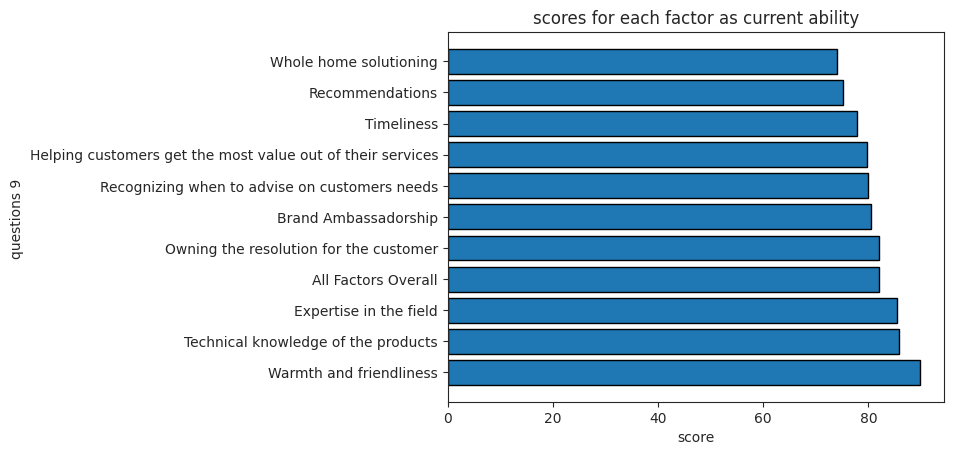

In [ ]:

plt.barh(sorted_values['index'],sorted_values['val'],edgecolor='black')
plt.xlabel('score')
plt.ylabel('questions 9 ')
plt.title('scores for each factor as current ability')
plt.show()

In [ ]:
cnt_srs = sorted_values
trace = go.Bar(
    x=cnt_srs['index'],
    y=cnt_srs['val'],
    marker=dict(
        color=cnt_srs['val'],
        colorscale = 'Viridis',
        colorbar=dict(title="Colorbar"),
        reversescale = True
    ),
)

layout = go.Layout(
    title='scores for each factor as current ability by frontline'
)

data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
fig.show()

In [ ]:
#best score on tech ops corr frontline
selected = Q9[['Participant','Division','Role','Frontline Role', 'Tenure', 'Role Tenure']]
correlations = selected.corrwith(Q9['Whole home solutioning'])
correlations = correlations.sort_values(ascending=False)
correlations

Frontline Role    0.047976
Role Tenure       0.004616
Role              0.003178
Division         -0.041156
Tenure           -0.041989
Participant            NaN
dtype: float64

In [ ]:
#best score on tech ops corr frontline
selected9_l = Q9_l[['Participant','Division','Role','Frontline Role', 'Tenure', 'Role Tenure']]
correlations9_l = selected9_l.corrwith(Q9_l['Expertise in the field'])
correlations9_l = correlations9_l.sort_values(ascending=False)
correlations9_l

Role              0.228346
Division         -0.068969
Participant            NaN
Frontline Role         NaN
Tenure                 NaN
Role Tenure            NaN
dtype: float64

In [ ]:
sum(Q9['Infoq9rate6Exper'])

77061

In [ ]:
group9a = Q9.groupby('Division')['Warmth and friendliness'].sum()
group9a
group9b = Q9.groupby('Frontline Role')['Warmth and friendliness'].sum()
#group9b

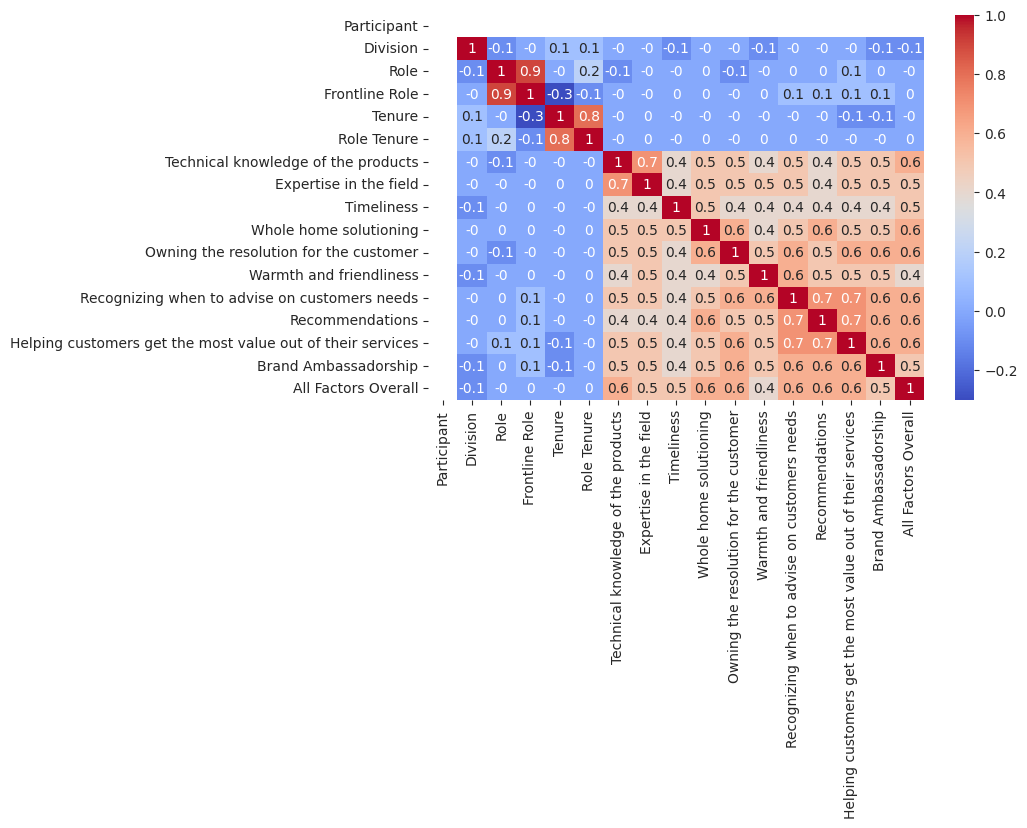

In [ ]:
selected = Q9[['Participant','Division','Role','Frontline Role', 'Tenure', 'Role Tenure']]
pd.concat([fac,b],axis = 1)
# Compute the correlation matrix
corr_matrix = round((pd.concat([selected,Q9.iloc[:,6:]],axis = 1).corr()),1)

# Create a heatmap using Seaborn
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

## Q12
### Infoq12single: How important are the following for a Technician’s role?
##### Connecting and creating trust with each serviced customer.
##### Making recommendations to the customer to help them get the most value out of their Telecomm Inc.  services.
##### Acting as an Telecomm Inc.  Ambassador and promoting the Telecomm Inc.  Brand.

In [ ]:
temp = data.filter(like='Infoq12')
Q12 = pd.concat([fac,temp],axis = 1)
temp_l = data_l.filter(like='Infoq12')
Q12_l = pd.concat([fac_l,temp_l],axis = 1)

In [ ]:
Q12.rename(columns = {'Infoq12singler1':'Connecting and creating trust with each serviced customer', 'Infoq12singler2':'Making recommendations to the customer to help them get the most value',
                      'Infoq12singler3': 'Acting as an Telecomm Inc.  Ambassador',}, inplace = True)
Q12_l.rename(columns = {'Infoq12singler1':'Connecting and creating trust with each serviced customer', 'Infoq12singler2':'Making recommendations to the customer to help them get the most value',
                      'Infoq12singler3': 'Acting as an Telecomm Inc.  Ambassador',}, inplace = True)

In [ ]:
Q12.columns

Index(['Participant', 'Division', 'Role', 'Frontline Role', 'Tenure',
       'Role Tenure',
       'Connecting and creating trust with each serviced customer',
       'Making recommendations to the customer to help them get the most value',
       'Acting as an Telecomm Inc.  Ambassador'],
      dtype='object')

In [ ]:
one = []
two = []
three = []
four = []
five = []
names = []
use = ['Connecting and creating trust with each serviced customer','Making recommendations to the customer to help them get the most value', 'Acting as an Telecomm Inc.  Ambassador']

for col in use:
    cnt_srs = Q12[col].value_counts()
    names.append(col)
    one.append(cnt_srs[1])
    two.append(cnt_srs[2])
    three.append(cnt_srs[3])
    four.append(cnt_srs[4])
    five.append(cnt_srs[5])

trace1 = go.Bar(
    y=names,
    x=one,
    orientation = 'h',
    name = "Not at all important"
)
trace2 = go.Bar(
    y=names,
    x=two,
    orientation = 'h',
    name = "Not very important"
)
trace3 = go.Bar(
    y=names,
    x=three,
    orientation = 'h',
    name = "Somewhat important"
)
trace4 = go.Bar(
    y=names,
    x=four,
    orientation = 'h',
    name = "Very important"
)
trace5 = go.Bar(
    y=names,
    x=five,
    orientation = 'h',
    name = "Extremely important"
)

layout = go.Layout(
    title='How important are the following for a Technician’s role? - from frontline',
    barmode='stack',
    width = 1300,
    height = 400
    #yaxis=dict(tickangle=-45),
)

data1 = [trace1, trace2, trace3, trace4,trace5 ]
fig = go.Figure(data=data1, layout=layout)
fig.show()
#py.iplot(fig, filename="WorkToolsFrequency")

In [ ]:
use12_l =Q12_l.drop(['Participant','Division',	'Role',	'Frontline Role',	'Tenure',	'Role Tenure'], axis = 1)
use12_l = use12_l.apply(pd.Series.value_counts)
use12_l

,Connecting and creating trust with each serviced customer,Making recommendations to the customer to help them get the most value,Acting as an Telecomm Inc. Ambassador
3,1,3,1
4,4,12,10
5,17,7,11


In [ ]:
col_to_use = use12_l.columns
three = []
four = []
five = []
names = []
use = ['Connecting and creating trust with each serviced customer','Making recommendations to the customer to help them get the most value', 'Acting as an Telecomm Inc.  Ambassador']

for col in col_to_use:
    cnt_srs = use12_l[col]
    names.append(col)
    three.append(cnt_srs[3])
    four.append(cnt_srs[4])
    five.append(cnt_srs[5])


trace3 = go.Bar(
    y=names,
    x=three,
    orientation = 'h',
    name = "Somewhat important"
)
trace4 = go.Bar(
    y=names,
    x=four,
    orientation = 'h',
    name = "Very important"
)
trace5 = go.Bar(
    y=names,
    x=five,
    orientation = 'h',
    name = "Extremely important"
)

layout = go.Layout(
    title='How important are the following for a Technician’s role? from leadership',
    barmode='stack',
    width = 1300,
    height = 400
    #yaxis=dict(tickangle=-45),
)

data1 = [trace3, trace4,trace5 ]
fig = go.Figure(data=data1, layout=layout)
fig.show()
#py.iplot(fig, filename="WorkToolsFrequency")

In [ ]:
#worst tech op score corr

corr_A = Q12.corr()['Acting as an Telecomm Inc.  Ambassador']

#correlations1 = temp.corrwith(temp['Infoq12singler3'])
#correlations1 = correlations1.sort_values(ascending=False)
#correlations1
corr_A

Participant                                                                    NaN
Division                                                                 -0.046916
Role                                                                     -0.041495
Frontline Role                                                           -0.022125
Tenure                                                                   -0.043700
Role Tenure                                                              -0.023293
Connecting and creating trust with each serviced customer                 0.405635
Making recommendations to the customer to help them get the most value    0.608978
Acting as an Telecomm Inc.  Ambassador                                    1.000000
Name: Acting as an Telecomm Inc.  Ambassador, dtype: float64

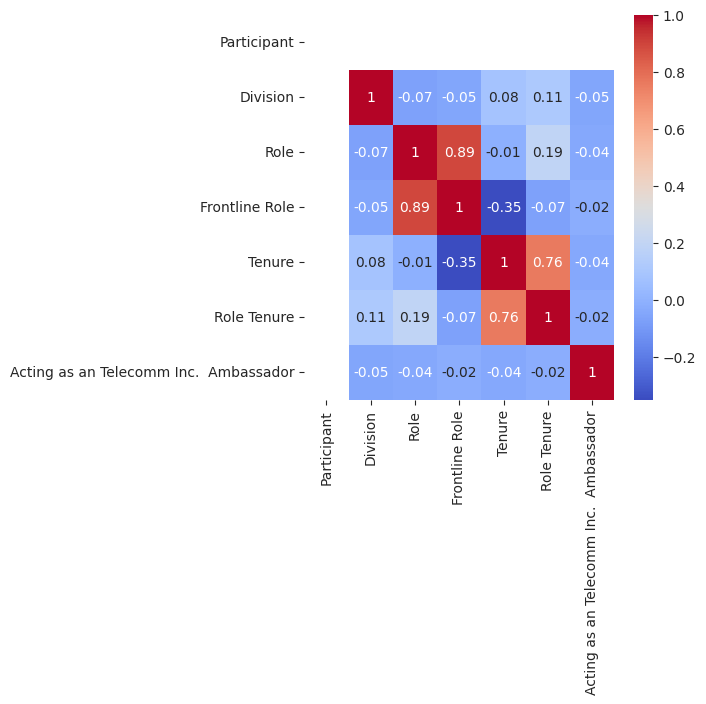

In [ ]:
temp = Q12.drop(columns=['Connecting and creating trust with each serviced customer', 'Making recommendations to the customer to help them get the most value'])

# Compute the correlation matrix
corr_matrix1 = round(temp.corr(),2)

# Create a heatmap using Seaborn
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:

group12

Participant
1     22
2    837
Name: Infoq12singler3, dtype: int64

In [ ]:
group12 = temp.groupby('Division')['Acting as an Telecomm Inc.  Ambassador'].count()
total = group12.sum()
percentages = group12.apply(lambda x: 100 * x / total)
percentages = percentages.rename(index={0: 'West', 1:'Central', 2:'East',3:'HQ'})

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=percentages.index, values=percentages.values, name="division",marker_colors=['#0000FF', '#00FFFF']),1, 1)


# Set the layout of the figure to show the percentage values inside the pie chart
fig.update_layout(
    title_text = "Division Distribution contributing to Acting as an Telecomm Inc. Ambassador being the least important ",font=dict(size=12), legend=dict(orientation="h"))
    #,annotations=[dict(text='division', x=0.11, y=0.5, font_size=20, showarrow=False)])

# Show the figure
fig.show()

##Q13
### How knowledgeable are you about the following products and services?

In [ ]:
temp13 = data.filter(like='Infoq13')
Q13 = pd.concat([fac,temp13],axis = 1)

temp13_l = data_l.filter(like='Infoq13')
Q13_l = pd.concat([fac_l,temp13_l],axis = 1)

In [ ]:
Q13a = pd.concat([fac,data.filter(like='Infoq13singler1')],axis = 1)
Q13b = pd.concat([fac,data.filter(like='Infoq13singler2')],axis = 1)
Q13c = pd.concat([fac,data.filter(like='Infoq13singler3')],axis = 1)
Q13d = pd.concat([fac,data.filter(like='Infoq13singler4')],axis = 1)
Q13e = pd.concat([fac,data.filter(like='Infoq13singler5')],axis = 1)
Q13f = pd.concat([fac,data.filter(like='Infoq13singler6')],axis = 1)


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

counta = Q13a['Infoq13singler1'].value_counts().reset_index()
counta['index'] = counta['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

countb = Q13b['Infoq13singler2'].value_counts().reset_index()
countb['index'] = countb['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})


countc = Q13c['Infoq13singler3'].value_counts().reset_index()
countc['index'] = countc['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

countd = Q13d['Infoq13singler4'].value_counts().reset_index()
countd['index'] = countd['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

counte = Q13e['Infoq13singler5'].value_counts().reset_index()
counte['index'] = counte['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

countf = Q13f['Infoq13singler6'].value_counts().reset_index()
countf['index'] = countf['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

#pie_a = go.Pie(labels=counta['index'],values=counta['Infoq13singler1'],name="Mobile",hole=0.4,domain={'x': [0.1,0.9]})
#pie_b = go.Pie(labels=countb['index'],values=countb['Infoq13singler2'],name="Wave",hole=0.4,domain={'x': [0.7,0.9]})
#pie_c = go.Pie(labels=countc['index'],values=countc['Infoq13singler3'],name="Internet",hole=0.4,domain={'x': [0.1,0.2]})
#pie_d = go.Pie(labels=countd['index'],values=countd['Infoq13singler4'],name="App Compete",hole=0.4,domain={'x': [0,0.46]})
#pie_e = go.Pie(labels=counte['index'],values=counte['Infoq13singler5'],name="Mega",hole=0.4,domain={'x': [0,0.46]})
#pie_f = go.Pie(labels=countf['index'],values=countf['Infoq13singler6'],name="Rewards",hole=0.4,domain={'x': [0,0.46]})

colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80']


# Create subplots: use 'domain' type for Pie subplot
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}], [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=3, cols=3, specs=specs)

fig.add_trace(go.Pie(labels=counta['index'],values=counta['Infoq13singler1'],name="Mobile"),
              1, 1)
fig.add_trace(go.Pie(labels=countb['index'],values=countb['Infoq13singler2'],name="Wave"),
              1, 2)
fig.add_trace(go.Pie(labels=countc['index'],values=countc['Infoq13singler3'],name="Internet"),
              1, 3)
fig.add_trace(go.Pie(labels=countd['index'],values=countd['Infoq13singler4'],name="App"),
              2, 1)
fig.add_trace(go.Pie(labels=counte['index'],values=counte['Infoq13singler5'],name="Mega"),
              2, 2)
fig.add_trace(go.Pie(labels=countf['index'],values=countf['Infoq13singler6'],name="Rewards"),
              2, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")




fig.update_layout(
    title_text="Distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Mobile', x=0.122, y=0.9, font_size=13, showarrow=False),
                 dict(text='Wave', x=0.5, y=0.9, font_size=13, showarrow=False),
                 dict(text='Internet', x=0.882, y=0.9, font_size=12, showarrow=False),
                 dict(text='App', x=0.125, y=0.5, font_size=14, showarrow=False),
                 dict(text='Mega', x=0.5, y=0.5, font_size=13, showarrow=False),
                 dict(text='Rewards', x=0.882, y=0.5, font_size=11, showarrow=False)])
fig.show()

#fig = dict(data=[pie_a, pie_b, pie_c, pie_d, pie_e, pie_f], layout=layout)
#fig = dict(data=[pie_a, pie_b, pie_c], layout=layout)18
#py.iplot(fig)

In [ ]:
Q13al = pd.concat([fac,data_l.filter(like='Infoq13singler1')],axis = 1)
Q13bl = pd.concat([fac,data_l.filter(like='Infoq13singler2')],axis = 1)
Q13cl = pd.concat([fac,data_l.filter(like='Infoq13singler3')],axis = 1)
Q13dl = pd.concat([fac,data_l.filter(like='Infoq13singler4')],axis = 1)
Q13el = pd.concat([fac,data_l.filter(like='Infoq13singler5')],axis = 1)
Q13fl = pd.concat([fac,data_l.filter(like='Infoq13singler6')],axis = 1)

counta = Q13al['Infoq13singler1'].value_counts().reset_index()
counta['index'] = counta['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

countb = Q13bl['Infoq13singler2'].value_counts().reset_index()
countb['index'] = countb['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})


countc = Q13cl['Infoq13singler3'].value_counts().reset_index()
countc['index'] = countc['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

countd = Q13dl['Infoq13singler4'].value_counts().reset_index()
countd['index'] = countd['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

counte = Q13el['Infoq13singler5'].value_counts().reset_index()
counte['index'] = counte['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})

countf = Q13fl['Infoq13singler6'].value_counts().reset_index()
countf['index'] = countf['index'].replace({1: 'Not at all knowledgeable', 2: 'Not very knowledgeable', 3: 'Somewhat knowledgeable', 4: 'Very knowledgeable',5:'Extremely knowledgeable'})


colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80']


# Create subplots: use 'domain' type for Pie subplot
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}], [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=3, cols=3, specs=specs)

fig.add_trace(go.Pie(labels=counta['index'],values=counta['Infoq13singler1'],name="Mobile"),
              1, 1)
fig.add_trace(go.Pie(labels=countb['index'],values=countb['Infoq13singler2'],name="Wave"),
              1, 2)
fig.add_trace(go.Pie(labels=countc['index'],values=countc['Infoq13singler3'],name="Internet"),
              1, 3)
fig.add_trace(go.Pie(labels=countd['index'],values=countd['Infoq13singler4'],name="App"),
              2, 1)
fig.add_trace(go.Pie(labels=counte['index'],values=counte['Infoq13singler5'],name="Mega"),
              2, 2)
fig.add_trace(go.Pie(labels=countf['index'],values=countf['Infoq13singler6'],name="Rewards"),
              2, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")




fig.update_layout(
    title_text="Distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Mobile', x=0.122, y=0.9, font_size=13, showarrow=False),
                 dict(text='Wave', x=0.5, y=0.9, font_size=13, showarrow=False),
                 dict(text='Internet', x=0.882, y=0.9, font_size=12, showarrow=False),
                 dict(text='App', x=0.125, y=0.5, font_size=14, showarrow=False),
                 dict(text='Mega', x=0.5, y=0.5, font_size=13, showarrow=False),
                 dict(text='Rewards', x=0.882, y=0.5, font_size=11, showarrow=False)])
fig.show()



## Q15
###How comfortable are you with communicating the benefits of the following products and services during in-home visits?

In [ ]:
temp15 = data.filter(like='Infoq15')
Q15 = pd.concat([fac,temp15],axis = 1)

temp15_l = data_l.filter(like='Infoq15')
Q15_l = pd.concat([fac_l,temp15_l],axis = 1)

In [ ]:
use = Q15.filter(like='Infoq15')
use = use.apply(pd.Series.value_counts)
use.fillna(0)

use

,Infoq15singler1,Infoq15singler2,Infoq15singler3,Infoq15singler4,Infoq15singler5,Infoq15singler6
1,83,12,1,21,NaN,78
2,118,35,2,40,4.0,137
3,265,130,20,202,19.0,311
4,212,309,202,240,201.0,173
5,159,351,612,334,613.0,138


In [ ]:
d1 = {'Infoq15singler1': 'Mobile',
        'Infoq15singler2': 'Wave',
        'Infoq15singler3': 'Internet','Infoq15singler4': "App", 'Infoq15singler5':'Mega', 'Infoq15singler6': 'Rewards'}

# call rename () method
use.rename(columns=d1,inplace=True)

In [ ]:
names = []
aa= []
bb = []
cc = []
dd = []
ee = []

cols_to_use = ["Mobile", "Wave", "Internet",
              "App", "Mega", "Rewards"]
for col in cols_to_use:
    cnt_srs = use[col]
    names.append(col)
    aa.append(cnt_srs[1])
    bb.append(cnt_srs[2])
    cc.append(cnt_srs[3])
    dd.append(cnt_srs[4])
    ee.append(cnt_srs[5])
#d1 = {"Infoq15singler1": 'Mobile'}


trace1 = go.Bar(
    y=aa,
    x=names,
    orientation = 'v',
    name = "Not at all comfortable",
    marker = dict(color='rgba(55, 128, 191, 0.7)')
)
trace2 = go.Bar(
    y=bb,
    x=names,
    orientation = 'v',
    name = "Not very comfortable",
    marker = dict(color = 'rgba(246, 78, 139, 0.6)')
)
trace3 = go.Bar(
    y=cc,
    x=names,
    orientation = 'v',
    name = "Somewhat comfortable",
    marker = dict(color = 'rgba(222,45,38,0.8)')
)
trace4 = go.Bar(
    y=dd,
    x=names,
    orientation = 'v',
    name = "Very comfortable",
    marker = dict(color='rgba(50, 171, 96, 0.6)')
)

trace5 = go.Bar(
    y=ee,
    x=names,
    orientation = 'v',
    name = "Extremely comfortable",
    marker = dict(color='rgba(50, 17, 96, 0.6)')
)

layout = go.Layout(
    title=' How comfortable are you with communicating the benefits of the following products and services during in-home visits? - front line',
    barmode='stack',
    width = 1000,
    height = 500
    #yaxis=dict(tickangle=-45),
)

data15 = [trace1, trace2, trace3, trace4, trace5]
fig = go.Figure(data=data15, layout=layout)
fig.show()

In [ ]:
use15_l = Q15_l.filter(like='Infoq15')
use15_l = use15_l.apply(pd.Series.value_counts)

use15_l.rename(columns=d1,inplace=True)
use15_l = use15_l.fillna(0)


In [ ]:
names = []
aa= []
bb = []
cc = []
dd = []
ee = []

cols_to_use = ["Mobile", "Wave", "Internet",
              "App", "Mega", "Rewards"]
for col in cols_to_use:
    cnt_srs = use15_l[col]
    names.append(col)
    aa.append(cnt_srs[1])
    bb.append(cnt_srs[2])
    cc.append(cnt_srs[3])
    dd.append(cnt_srs[4])
    ee.append(cnt_srs[5])
#d1 = {"Infoq15singler1": 'Mobile'}


trace1 = go.Bar(
    y=aa,
    x=names,
    orientation = 'v',
    name = "Not at all comfortable",
    marker = dict(color='rgba(55, 128, 191, 0.7)')
)
trace2 = go.Bar(
    y=bb,
    x=names,
    orientation = 'v',
    name = "Not very comfortable",
    marker = dict(color = 'rgba(246, 78, 139, 0.6)')
)
trace3 = go.Bar(
    y=cc,
    x=names,
    orientation = 'v',
    name = "Somewhat comfortable",
    marker = dict(color = 'rgba(222,45,38,0.8)')
)
trace4 = go.Bar(
    y=dd,
    x=names,
    orientation = 'v',
    name = "Very comfortable",
    marker = dict(color='rgba(50, 171, 96, 0.6)')
)

trace5 = go.Bar(
    y=ee,
    x=names,
    orientation = 'v',
    name = "Extremely comfortable",
    marker = dict(color='rgba(50, 17, 96, 0.6)')
)

layout = go.Layout(
    title='How comfortable are you with communicating the benefits of the following products and services during in-home visits? - leadership',
    barmode='stack',
    width = 1000,
    height = 500
    #yaxis=dict(tickangle=-45),
)

data15 = [trace1, trace2, trace3, trace4, trace5]
fig = go.Figure(data=data15, layout=layout)
fig.show()

In [ ]:
t15 = Q15.drop(['Infoq15singler1','Infoq15singler2', 'Infoq15singler3','Infoq15singler4','Infoq15singler5'],axis = 1)

In [ ]:

cor_15 = t15.corrwith(t15['Infoq15singler6'])
cor_15 = cor_15.sort_values(ascending=False)
cor_15

Infoq15singler6    1.000000
Tenure             0.024054
Role Tenure       -0.018392
Division          -0.051306
Frontline Role    -0.142027
Role              -0.145084
Participant             NaN
dtype: float64

In [ ]:
group15 = Q15.groupby('Role')['Infoq15singler6'].count()
total15 = group15.sum()
percentages15 = group15.apply(lambda x: 100 * x / total15)
percentages15 = percentages15.rename(index={0: 'Supervisor', 1:'Technician 1',2:'Technician 2', 3: 'Technician 3', 4:'Technician 4', 5:'Director', 6:'Exec Director', 7:'Manager',8:'RVP', 9:'Sr Director', 10:'Sr Manager',11:'VP'})

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=percentages15.index, values=percentages15.values, pull=[0, 0.3, 0.3, 0, 0, 0.5,0.5,0.5,0.5,0.5,0.5], name="2017", marker_colors=['#0000FF', '#00FFFF']),1, 1)

explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4,0.6)

# Set the layout of the figure to show the percentage values inside the pie chart
fig.update_layout(
    title = dict(text="Role distribution of Rewards being the most uncomfortable commincation",y=0.7), font=dict(size=12),width=1500, height=1500, legend=dict(x=0.3,y=0.5,orientation="v", yanchor='middle',xanchor='left'))
    #,annotations=[dict(text='Role Tenure', x=0.11, y=0.5, font_size=20, showarrow=False)])
                 #dict(text='2018', x=0.5, y=0.5, font_size=20, showarrow=False),
                 #dict(text='2019', x=0.88, y=0.5, font_size=20, showarrow=False)])

# Show the figure
fig.show()

## Q16
### What are your biggest obstacles when sharing information about Telecomm Inc.  products and services with customers during in-home visits?

In [ ]:
temp16 = data.filter(like='Infoq16')
Q16 = pd.concat([fac,temp16],axis = 1)
Q16
use16 = Q16.filter(like='Infoq16')
use16 = use16.drop(['Infoq16multir7oeoe'],axis = 1)
use16 = use16.astype(bool).sum(axis=0)
#use16 = np.count_nonzero(use16, axis=1)
sorted_16 = use16.sort_values()
sorted_16

Infoq16multir4       64
Infoq16multir7oe    119
Infoq16multir2      130
Infoq16multir1      146
Infoq16multir5      289
Infoq16multir3      296
Infoq16multir6      630
dtype: int64

In [ ]:
temp16_l = data_l.filter(like='Infoq16')
Q16_l = pd.concat([fac_l,temp16_l],axis = 1)
Q16_l
use16_l = Q16_l.filter(like='Infoq16')
use16_l = use16_l.drop(['Infoq16multir7oeoe'],axis = 1)
use16_l = use16_l.astype(bool).sum(axis=0)
#use16 = np.count_nonzero(use16, axis=1)
sorted_16_l = use16_l.sort_values()
sorted_16_l

Infoq16multir2       0
Infoq16multir7oe     0
Infoq16multir3       2
Infoq16multir1       3
Infoq16multir4      11
Infoq16multir5      14
Infoq16multir6      14
dtype: int64

In [ ]:
#cnt_srs = mcr_df['WorkDataVisualizations'].value_counts().head(25)
sorted_16.rename(index = {'Infoq16multir1':'Lack of product knowledge','Infoq16multir2':'Difficult Tools for product learning','Infoq16multir3':'Customer lack of interest',
                      'Infoq16multir4':'when / how to have the conversation','Infoq16multir5':'Too many competing priorities','Infoq16multir6':'Technician time constraints',
                      'Infoq16multir7oe':'Other'}, inplace = True)
index = sorted_16.index
values = sorted_16.values

trace = go.Bar(
    x=index,
    y=values,
    marker=dict(
        color=values,
        colorscale = 'Blues',
        reversescale = True,
        showscale=True
    ),
)

layout = go.Layout(
    title='What are your biggest obstacles when sharing information about Telecomm Inc.  products and services with customers during in-home visits?'
)

data16 = [trace]
fig = go.Figure(data=data16, layout=layout)
py.iplot(fig, filename="WorkDataVisualizations")

In [ ]:

sorted_16_l.rename(index = {'Infoq16multir1':'Lack of product knowledge','Infoq16multir2':'Difficult Tools for product learning','Infoq16multir3':'Customer lack of interest',
                      'Infoq16multir4':'when / how to have the conversation','Infoq16multir5':'Too many competing priorities','Infoq16multir6':'Technician time constraints',
                      'Infoq16multir7oe':'Other'}, inplace = True)
index = sorted_16_l.index
values = sorted_16_l.values

trace = go.Bar(
    x=index,
    y=values,
    marker=dict(
        color=values,
        colorscale = 'Blues',
        reversescale = True,
        showscale=True
    ),
)

layout = go.Layout(
    title='What are your biggest obstacles when sharing information about Telecomm Inc.  products and services with customers during in-home visits? - leadership'
)

data16 = [trace]
fig = go.Figure(data=data16, layout=layout)
py.iplot(fig, filename="WorkDataVisualizations")

In [ ]:
other16 = (Q16['Infoq16multir7oeoe']).reset_index()
other16 = other16.rename(columns={'Infoq16multir7oeoe': 'Comments'})
other16["Comments"].replace("", np.nan, inplace=True)
other16 = other16.dropna()
# remove any rows with new empty strings following the clean-up

other16

,index,Comments
0,0,Telecomm Inc. has cut times on jobs which rus...
5,6,Not having the equipment
10,12,Customer expectations
15,17,Call Center mistakes
18,20,Prices keep changing. So many packages
...,...,...
781,802,Customers having faith in our product
784,805,Clear expectations set prior to visit
786,807,delivering what we are promising
815,837,The bad experience when they initially call


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop = set(stopwords.words('english'))
remove_non_alphabets = lambda x: re.sub(r'[^a-zA-Z]',' ',x)

# tokenn alphabets-only list
tokenize = lambda x: word_tokenize(x)

# assign ps to a lambda function to run on each line of value
ps = PorterStemmer()
stem = lambda w: [ ps.stem(x) for x in w ]


lemmatizer = WordNetLemmatizer()
lemmtizer = lambda x: [ lemmatizer.lemmatize(word) for word in x ]

other16["Comments"]= other16["Comments"].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))
other16["Comments"]= other16["Comments"].apply(remove_non_alphabets)
other16["Comments"] = other16["Comments"].apply(tokenize)
other16["Comments"] = other16["Comments"].apply(stem)
other16["Comments"] = other16["Comments"].apply(lemmtizer)
other16["Comments"]= other16["Comments"].apply(lambda x: ' '.join(x))
other16

,index,Comments
0,0,telecomm inc cut time job rush u
5,6,equip
10,12,custom expect
15,17,call center mistak
18,20,price keep chang mani packag
...,...,...
781,802,custom faith product
784,805,clear expect set prior visit
786,807,deliv promis
815,837,bad experi initi call


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
other16['Comments'].dropna(inplace = True)

In [ ]:
!pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#-1 negative, 0 neutral, 1 positive
other16["score_TextBlob"] = other16["Comments"].map(lambda x:TextBlob(x).sentiment.polarity)
#0 obejctive - 1 subjective

other16["score_subjectivity"]= other16["Comments"].map(lambda x:TextBlob(x).sentiment.subjectivity)
avg_polarity16 = other16["score_TextBlob"].mean()
avg_polarity16

-0.025092633355345218

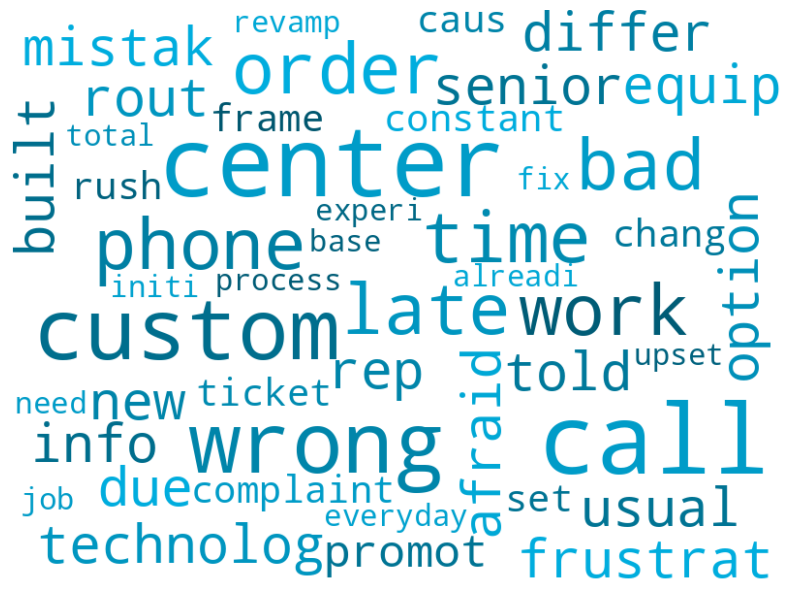

In [ ]:
negdf16 = other16[other16["score_TextBlob"] < 0]
negatives16 = []
for review in negdf16["Comments"]:
    negatives16.append(review)
negatives16 = pd.Series(negatives16).str.cat(sep=" ")


# color function for the wordcloud
def color_wc(word=None,font_size=None,position=None, orientation=None,font_path=None, random_state=None):
    h = int(360.0 * 135.0 / 255.0)
    s = int(190.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(40, 80)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


fig = plt.gcf()
fig.set_size_inches(10, 8)
wc = WordCloud(background_color="white", contour_width=2, contour_color='orange',width=800, height=600,color_func=color_wc,max_words=200, max_font_size=100,random_state= 10)

wc.generate(negatives16)
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')

## Q20
### Of the options below, what resources do you use most when looking for information on Telecomm Inc. ’s brand, products or services.

In [ ]:
temp20 = data.filter(like='Infoq20')
Q20 = pd.concat([fac,temp20],axis = 1)
use20 = Q20.filter(like='Infoq20')
use20 = use20.drop(['Infoq20multir7oeoe'],axis = 1)
use20 = use20.astype(bool).sum(axis=0)
#use16 = np.count_nonzero(use16, axis=1)
sorted_20 = use20.sort_values()
sorted_20 = sorted_20.rename(index = {'Infoq20multir1': 'Tech Ops Portal', 'Infoq20multir2': 'LMSHub2.0', 'Infoq20multir3': 'TheHub1.5',
                                      'Infoq20multir4': 'iWin7', 'Infoq20multir5': 'Telecomm Inc.  Now', 'Infoq20multir6':'Workday', 'Infoq20multir7oe':'Other'})


In [ ]:
temp20_l = data_l.filter(like='Infoq20')
Q20_l = pd.concat([fac_l,temp20_l],axis = 1)
use20_l = Q20_l.filter(like='Infoq20')
use20_l = use20_l.drop(['Infoq20multir7oeoe'],axis = 1)
use20_l = use20_l.astype(bool).sum(axis=0)
#use16 = np.count_nonzero(use16, axis=1)
sorted_20_l = use20_l.sort_values()
sorted_20_l


Infoq20multir1      22
Infoq20multir2      22
Infoq20multir3      22
Infoq20multir4      22
Infoq20multir5      22
Infoq20multir6      22
Infoq20multir7oe    22
dtype: int64

In [ ]:


trace = go.Scatter(
    x=sorted_20.index,
    y=sorted_20.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 0.5,
        size = 20,
        #color = np.random.randn(500), #set color equal to a variable
        color = sorted_20.values,
        colorscale='Inferno',
        showscale=True
    ),
)

layout = go.Layout(
    title='what resources do you use most when looking for information on Telecomm Inc. ’s brand, products or services.'
)

data20 = [trace]
fig = go.Figure(data=data20, layout=layout)
fig.show()

In [ ]:
other20 = (Q20['Infoq20multir7oeoe']).reset_index()
other20 = other20.rename(columns={'Infoq20multir7oeoe': 'Comments'})
other20["Comments"].replace("", np.nan, inplace=True)
other20 = other20.dropna()
# remove any rows with new empty strings following the clean-up

other20

,index,Comments
3,3,Co workers
5,6,None . Learn from experience
10,12,Other technicians
11,13,Google
13,15,Team members such as supervisor and coworkers
...,...,...
815,837,Not sure
820,842,Supervisor
824,846,Coworker
835,857,::face palm::


In [ ]:
other20["Comments"]= other20["Comments"].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))
other20["Comments"]= other20["Comments"].apply(remove_non_alphabets)
other20["Comments"] = other20["Comments"].apply(tokenize)
other20["Comments"] = other20["Comments"].apply(stem)
other20["Comments"] = other20["Comments"].apply(lemmtizer)
other20["Comments"]= other20["Comments"].apply(lambda x: ' '.join(x))
other20

,index,Comments
3,3,co worker
5,6,none learn experi
10,12,technician
11,13,googl
13,15,team member supervisor cowork
...,...,...
815,837,sure
820,842,supervisor
824,846,cowork
835,857,face palm


In [ ]:
#-1 negative, 0 neutral, 1 positive
other20["score_TextBlob"] = other20["Comments"].map(lambda x:TextBlob(x).sentiment.polarity)
#0 obejctive - 1 subjective

other20["score_subjectivity"]= other20["Comments"].map(lambda x:TextBlob(x).sentiment.subjectivity)

avg_polarity20 = other20["score_TextBlob"].mean()
avg_polarity20

0.0007575757575757576

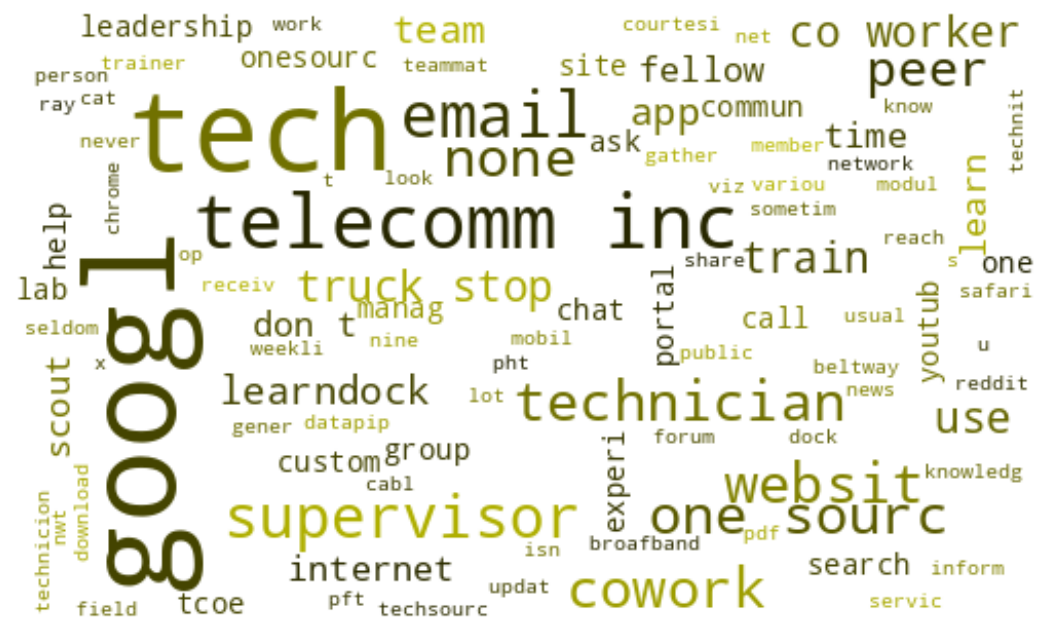

In [ ]:

posdf20 =other20[other20["score_TextBlob"] > 0]
positives20 = []
for review in posdf20["Comments"]:
    positives20.append(review)
positives20 = pd.Series(positives20).str.cat(sep=" ")

# color function for the wordcloud
def color_wc(word=None,font_size=None,position=None, orientation=None,font_path=None, random_state=None):
    h = int(360.0 * 135.0 / 800.0)
    s = int(190.0 * 255.0 / 400.0)
    l = int(100.0 * float(random_state.randint(10, 50)) / 150.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


fig = plt.gcf()
fig.set_size_inches(16, 8)
wc = WordCloud(background_color="white", contour_width=1, contour_color='orange',width=500, height=300,color_func=color_wc,max_words=100, max_font_size=60,random_state=20)
wc.generate(' '.join(other20['Comments']))
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')

## Q21
### On average I access TheHub1.5:

In [ ]:
temp21 = data.filter(like='Infoq21')
Q21 = pd.concat([fac,temp21],axis = 1)
use21 = Q21['Infoq21single'].value_counts().sort_values()
use21.rename(index={1: 'Very Rarely',2:'Rarely ',3:'Occasionally ',4:'Frequently', 5:'Very Frequently'}, inplace=True)

use21

Very Frequently     24
Frequently          69
Occasionally       158
Rarely             214
Very Rarely        372
Name: Infoq21single, dtype: int64

In [ ]:
temp21_l = data_l.filter(like='Infoq21')
Q21_l = pd.concat([fac_l,temp21_l],axis = 1)
use21_l = Q21_l['Infoq21single'].value_counts().sort_values()
use21_l.rename(index={1: 'Very Rarely',2:'Rarely ',3:'Occasionally ',4:'Frequently', 5:'Very Frequently'}, inplace=True)
use21_l

Series([], Name: Infoq21single, dtype: int64)

In [ ]:
trace = go.Pie(labels=use21.index, values=use21.values, hole=.6)

# Define the color scale for each category
colors = ['rgb(255,105,180)','#FFC300', '#FF5733', '#C70039', '#900C3F']

# Set the color attribute for each category
trace.marker.colors = colors

# Create a layout for the chart
layout = go.Layout(title=dict(text='Q21 hub 1.5 access',x = 0.5), height=400,width = 500, legend = dict(x=0.3,
        y=0, orientation='h'))

# Create a figure object and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Show the chart
fig.show()

In [ ]:
corr_21 = Q21.corrwith(Q21['Infoq21single'])
corr_21.sort_values()


Frontline Role   -0.288308
Role             -0.255497
Role Tenure      -0.078170
Division         -0.001999
Tenure            0.052951
Infoq21single     1.000000
Participant            NaN
dtype: float64

In [ ]:
group21 = Q21.groupby('Frontline Role')['Infoq21single'].count()

total21 = group21.sum()

percentages21 = group21.apply(lambda x: 100 * x / total21)

percentages21 = percentages21.rename(index = {0:'Supervisors',1:'Technicians'})

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=percentages21.index, values=percentages21.values, name="Q21 BY FRONTLINE ROLE",marker_colors=['#0000FF', '#00FFFF']),1, 1)


# Set the layout of the figure to show the percentage values inside the pie chart
fig.update_layout(
    title_text="FRONTLINE ROLE Distribution of acess hub1.5",font=dict(size=12), legend=dict(orientation="h"))
    #,annotations=[dict(text='Role Tenure', x=0.11, y=0.5, font_size=20, showarrow=False)])
                 #dict(text='2018', x=0.5, y=0.5, font_size=20, showarrow=False),
                 #dict(text='2019', x=0.88, y=0.5, font_size=20, showarrow=False)])

# Show the figure
fig.show()

## Q23
### The primary reason I access TheHub1.5 is:

In [ ]:
temp23 = data.filter(like='Infoq23')
Q23 = pd.concat([fac,temp23],axis = 1)
use23 = Q23['Infoq23single'].value_counts().sort_values()
use23.rename(index={1: 'View my commission',2:'See the latest incentives',3:'Complete missions',4:'Recognize my team / peers', 5:'Spend my TheHub1.5 points',6:'Other'}, inplace=True)
use23

View my commission            85
Other                        114
See the latest incentives    131
Spend my TheHub1.5 points    153
Complete missions            162
Recognize my team / peers    192
Name: Infoq23single, dtype: int64

In [ ]:
trace = go.Scatter(
    y=use23.index,
    x=use23.values,
    mode='markers',
    marker=dict(
        symbol = 'triangle-down',
        sizemode = 'diameter',
        sizeref = 30,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = use23.values,
        colorscale= 'sunset',
        showscale=True
    ),
)

layout = go.Layout(
    title='HUB USAGE' , height = 400, width = 700
)

data23 = [trace]
fig = go.Figure(data=data23, layout=layout)
py.iplot(fig, filename="WorkhardwareSelect")

In [ ]:
other23 = (Q23['Infoq23singler6oeoe']).reset_index()
other23 = other23.rename(columns={'Infoq23singler6oeoe': 'Comments'})
other23["Comments"].replace("", np.nan, inplace=True)
other23 = other23.dropna()
# remove any rows with new empty strings following the clean-up

other23

,index,Comments
2,2,little reward points to be earned
3,3,Look for mortgage pyments as an option
11,13,I don’t
14,16,N/a
29,31,I don’t
...,...,...
793,814,Seeing how little I earn compared to sales
802,824,Don’t really have time to check it out
805,827,I have never checked
808,830,I’ve never accessed eTheHub1.5


In [ ]:
other23["Comments"]= other23["Comments"].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))
other23["Comments"]= other23["Comments"].apply(remove_non_alphabets)
other23["Comments"] = other23["Comments"].apply(tokenize)
other23["Comments"] = other23["Comments"].apply(stem)
other23["Comments"] = other23["Comments"].apply(lemmtizer)
other23["Comments"]= other23["Comments"].apply(lambda x: ' '.join(x))
other23

,index,Comments
2,2,littl reward point earn
3,3,look mortgag pyment option
11,13,don t
14,16,n a
29,31,don t
...,...,...
793,814,see littl earn compar sale
802,824,don t realli time check
805,827,never check
808,830,i ve never access ethehub


In [ ]:
#-1 negative, 0 neutral, 1 positive
other23["score_TextBlob"] = other23["Comments"].map(lambda x:TextBlob(x).sentiment.polarity)
#0 obejctive - 1 subjective

other23["score_subjectivity"]= other23["Comments"].map(lambda x:TextBlob(x).sentiment.subjectivity)
avg_polarity23 = other23["score_TextBlob"].mean()
avg_polarity23

0.008313220702601234

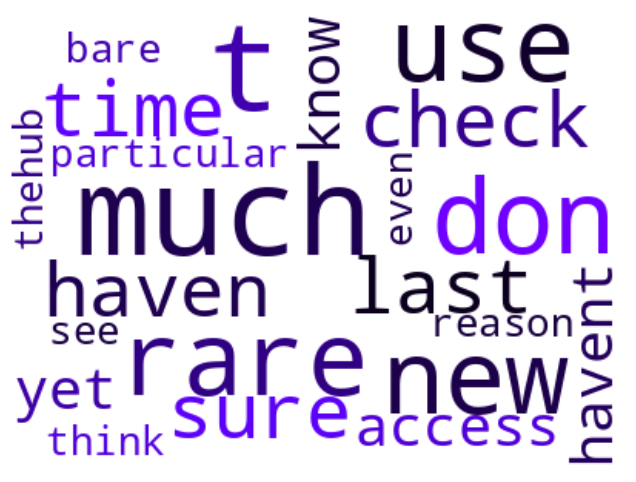

In [ ]:
# color function for the wordcloud

posdf23 = other23[other23["score_TextBlob"] > 0]
positives23 = []
for review in posdf23["Comments"]:
    positives23.append(review)
positives23 = pd.Series(positives23).str.cat(sep=" ")

def color_wc(word=None,font_size=None,position=None, orientation=None,font_path=None, random_state=None):
    h = int(360.0 * 190.0 / 255.0)
    s = int(190.0 * 155.0 / 205.0)
    l = int(100.0 * float(random_state.randint(15,150)) / 300.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


fig = plt.gcf()
fig.set_size_inches(10, 6)
wc = WordCloud(background_color="white", contour_width=2, contour_color='orange',width=400, height=300,color_func=color_wc,max_words=100, max_font_size=80,random_state=42)
wc.generate(positives23)
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')

## Q25
### The primary reason I do not access TheHub1.5 is:

In [ ]:
temp25 = data.filter(like='Infoq25')
Q25 = pd.concat([fac,temp25],axis = 1)
Q25
use25 = Q25['Infoq25single'].value_counts().sort_values()
use25.rename(index={1: 'I do not find it valuable',2:'see no needed info',3:'I don’t know what Hub1.5 is',4:'Other'}, inplace=True)
#over 30% values missing in q25
missing25 = (Q25['Infoq25single'].size - Q25['Infoq25single'].count())/Q25['Infoq25single'].size
use25

I don’t know what Hub1.5 is     72
see no needed info             118
I do not find it valuable      192
Other                          204
Name: Infoq25single, dtype: int64

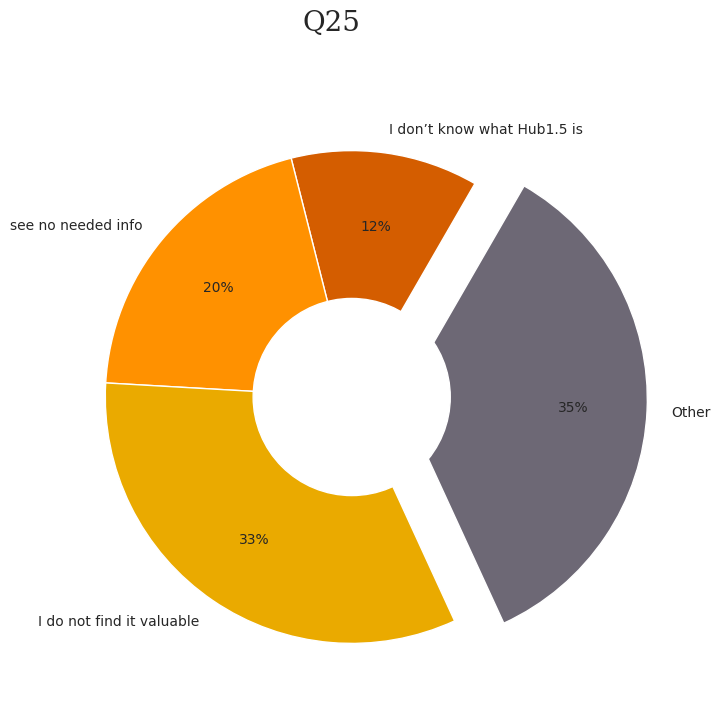

In [ ]:
title = 'Q25'

fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle(title, fontsize = 20, font="Serif")

explode = (0, 0, 0, 0.2)

labels = use25.index
sizes = use25.values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#d45d00","#ff9100","#eaaa00","#6d6875","#5e6875"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

#wmap = map_df(df, 'Q3', 'Q2')
#wma#

In [ ]:
other25 = (Q25['Infoq25singler4oeoe']).reset_index()
other25 = other25.rename(columns={'Infoq25singler4oeoe': 'Comments'})
other25["Comments"].replace("", np.nan, inplace=True)
other25 = other25.dropna()
# remove any rows with new empty strings following the clean-up

other25

,index,Comments
0,0,Hard to earn points guess tight budget
2,2,Not enough ways to earn points
3,3,it doesnt pay my bills
6,8,Too much in the site
18,20,Hard to understand
...,...,...
820,842,Not fully knowledgeable
823,845,It has not been a huge deal for me
826,848,Na
831,853,Don’t have time visit.


In [ ]:
other25["Comments"]= other25["Comments"].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))
other25["Comments"]= other25["Comments"].apply(remove_non_alphabets)
other25["Comments"] = other25["Comments"].apply(tokenize)
other25["Comments"] = other25["Comments"].apply(stem)
other25["Comments"] = other25["Comments"].apply(lemmtizer)
other25["Comments"]= other25["Comments"].apply(lambda x: ' '.join(x))
other25

,index,Comments
0,0,hard earn point guess tight budget
2,2,enough way earn point
3,3,doesnt pay bill
6,8,much site
18,20,hard understand
...,...,...
820,842,fulli knowledg
823,845,huge deal
826,848,na
831,853,don t time visit


In [ ]:
#-1 negative, 0 neutral, 1 positive
other25["score_TextBlob"] = other25["Comments"].map(lambda x:TextBlob(x).sentiment.polarity)
#0 obejctive - 1 subjective

other25["score_subjectivity"]= other25["Comments"].map(lambda x:TextBlob(x).sentiment.subjectivity)
avg_polarity25 = other25["score_TextBlob"].mean()
#other25
avg_polarity25

0.0050851067249582105

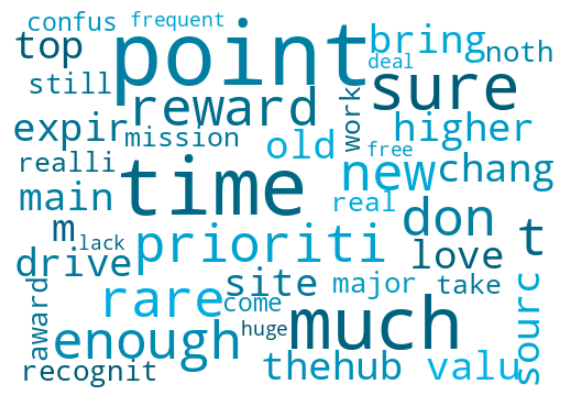

In [ ]:

posdf25 = other25[other25["score_TextBlob"] > 0]
positives25 = []
for review in posdf25["Comments"]:
    positives25.append(review)
positives25 = pd.Series(positives25).str.cat(sep=" ")



def color_wc(word=None,font_size=None,position=None, orientation=None,font_path=None, random_state=None):
    h = int(360.0 * 135.0 / 255.0)
    s = int(190.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(40, 80)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

fig = plt.gcf()
fig.set_size_inches(8, 5)
wc = WordCloud(background_color="white", contour_width=2, contour_color='orange',width=500, height=350,color_func=color_wc,max_words=100, max_font_size=80,random_state=42)
wc.generate(positives25)
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')
